# 코로나 확진자 추세에 따른 카드매출발생금액 예측
(2) 카드매출발생금액 데이터 전처리 및 시각화

## Data description
`card_20200717.csv` 업종별 카드매출발생금액 데이터
- `receipt_dttm` : 카드회사가 카드사용내역을 접수한 일자
- `adstrd_code` : 가맹점 위치 기준 행정동 코드
- `adstrd_nm` : 가맹점 위치 기준 행정동명
- `mrhst_induty_cl_code` : 가맹점 업종 코드
- `mrhst_induty_cl_nm` : 가맹점 업종명
- `selng_cascnt ` : 매출발생건수
- `salamt` : 매출발생금액

데이터 출처: [DACON-포스트 코로나 데이터 시각화 경진대회](https://dacon.io/competitions/official/235618/overview/)

## Preprocessing

In [211]:
# import required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.rc('font', family='AppleGothic')

In [212]:
# directory
current_path = os.getcwd()
data_DIR = os.path.join(current_path, 'data')
output_DIR = os.path.join(current_path, 'output')


# data path
card_path = os.path.join(data_DIR, 'dacon', 'card_20200717.csv')


# load data
card_df = pd.read_csv(card_path)

In [213]:
# check dataframe
card_df.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


In [214]:
# check datatype
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713952 entries, 0 to 3713951
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   receipt_dttm          int64 
 1   adstrd_code           int64 
 2   adstrd_nm             object
 3   mrhst_induty_cl_code  int64 
 4   mrhst_induty_cl_nm    object
 5   selng_cascnt          int64 
 6   salamt                int64 
dtypes: int64(5), object(2)
memory usage: 198.3+ MB


In [215]:
# check statistics
card_df[['selng_cascnt', 'salamt']].describe()

,selng_cascnt,salamt
count,3.713952e+06,3.713952e+06
mean,2.130553e+02,8.661771e+06
std,9.099785e+03,5.059716e+08
min,-1.892000e+03,-2.937331e+09
25%,2.000000e+00,1.150000e+05
50%,9.000000e+00,4.720705e+05
75%,4.700000e+01,1.817860e+06
max,5.729589e+06,5.421737e+11


In [216]:
# correct negative to abs
card_df['selng_cascnt'] = abs(card_df['selng_cascnt'])
card_df['salamt'] = abs(card_df['salamt'])

In [217]:
# number of missing values
print('전체 레코드 수:', len(card_df))
card_df.isnull().sum()

전체 레코드 수: 3713952


receipt_dttm            0
adstrd_code             0
adstrd_nm               0
mrhst_induty_cl_code    0
mrhst_induty_cl_nm      0
selng_cascnt            0
salamt                  0
dtype: int64

In [218]:
# create city code
card_df['adstrd_code'] = card_df['adstrd_code'].astype('str')
card_df['city_code'] = card_df['adstrd_code'].str[:5]

`str[]` : 문자열 인덱싱

참고: [pandas 문자열 관련 함수 str](https://yganalyst.github.io/data_handling/memo_9/)

In [219]:
# create city name
code_list = [card_df['city_code']=='11110',  #종로구
             card_df['city_code']=='11140',  #중구
             card_df['city_code']=='11170',  #용산구
             card_df['city_code']=='11200',  #성동구
             card_df['city_code']=='11215',  #광진구
             card_df['city_code']=='11230',  #동대문구
             card_df['city_code']=='11260',  #중랑구
             card_df['city_code']=='11290',  #성북구
             card_df['city_code']=='11305',  #강북구
             card_df['city_code']=='11320',  #도봉구
             card_df['city_code']=='11350',  #노원구
             card_df['city_code']=='11380',  #은평구
             card_df['city_code']=='11410',  #서대문구
             card_df['city_code']=='11440',  #마포구
             card_df['city_code']=='11470',  #양천구
             card_df['city_code']=='11500',  #강서구
             card_df['city_code']=='11530',  #구로구
             card_df['city_code']=='11545',  #금천구
             card_df['city_code']=='11560',  #영등포구
             card_df['city_code']=='11590',  #동작구
             card_df['city_code']=='11620',  #관악구
             card_df['city_code']=='11650',  #서초구
             card_df['city_code']=='11680',  #강남구
             card_df['city_code']=='11710',  #송파구
             card_df['city_code']=='11740']  #강동구

city_list = ['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구',
             '강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구',
             '구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']

card_df['city_nm'] = np.select(code_list, city_list, default='Not Specified')
card_df.city_nm.value_counts()

강남구     251546
송파구     237864
서초구     190906
강서구     188058
영등포구    174346
관악구     171189
마포구     157991
양천구     156806
강동구     156160
노원구     149573
성북구     148819
구로구     144594
광진구     142783
중구      139588
은평구     138247
중랑구     136109
성동구     133516
동대문구    130042
종로구     128563
동작구     124965
용산구     122887
서대문구    114279
도봉구     109287
금천구      91629
강북구      74205
Name: city_nm, dtype: int64

`np.select()` : 조건문에 따라 배열과 리스트 매칭

참고: [Pandas에서 주어진 조건에 따라 DataFrame 열을 만드는 방법](https://www.delftstack.com/ko/howto/python-pandas/how-to-create-dataframe-column-based-on-given-condition-in-pandas/)

BC 카드 업종코드 확인

<img src='https://www.bccard.com/etc/notice/__icsFiles/artimage/2013/02/04/c_163/ntc130204_sales02.gif'>

In [220]:
# check the number of type of industry
print('가맹점 업종코드:', len(card_df['mrhst_induty_cl_code'].unique()))
print('가맹점 업종명:', len(card_df['mrhst_induty_cl_nm'].unique()))

가맹점 업종코드: 261
가맹점 업종명: 260


In [221]:
# create industry code
card_df['mrhst_induty_cl_code'] = card_df['mrhst_induty_cl_code'].astype('str')
card_df['induty_code'] = card_df['mrhst_induty_cl_code'].str[:2]

print(len(card_df['induty_code'].unique()))
sorted(card_df['induty_code'].unique())

35


['10',
 '11',
 '20',
 '21',
 '22',
 '30',
 '31',
 '32',
 '33',
 '34',
 '40',
 '41',
 '42',
 '43',
 '44',
 '50',
 '51',
 '52',
 '60',
 '61',
 '62',
 '70',
 '71',
 '80',
 '81',
 '82',
 '83',
 '84',
 '90',
 '91',
 '92',
 '93',
 '95',
 '96',
 '99']

In [222]:
# check the code which is not in the table
print('10', card_df[card_df['induty_code']=='10']['mrhst_induty_cl_nm'].unique())
print('11', card_df[card_df['induty_code']=='11']['mrhst_induty_cl_nm'].unique())
print('41', card_df[card_df['induty_code']=='41']['mrhst_induty_cl_nm'].unique())
print('43', card_df[card_df['induty_code']=='43']['mrhst_induty_cl_nm'].unique())
print('44', card_df[card_df['induty_code']=='44']['mrhst_induty_cl_nm'].unique())
print('60', card_df[card_df['induty_code']=='60']['mrhst_induty_cl_nm'].unique())
print('62', card_df[card_df['induty_code']=='62']['mrhst_induty_cl_nm'].unique())
print('70', card_df[card_df['induty_code']=='70']['mrhst_induty_cl_nm'].unique())
print('95', card_df[card_df['induty_code']=='95']['mrhst_induty_cl_nm'].unique())
print('96', card_df[card_df['induty_code']=='96']['mrhst_induty_cl_nm'].unique())

10 ['기타숙박업' '특급 호텔' '1급 호텔' '2급 호텔' '콘   도']
11 ['관광여행' '택   시' '항 공 사' '렌 트 카' '여 객 선' '기타교통수단' '고속 버스' '철   도' '택시회사']
41 ['구내매점(국가기관등)' '공무원연금매점' '기타비영리유통']
43 ['침구수예점' '기타직물' '옷감 직물' '혼수전문점']
44 ['악세 사리' '기타잡화' '신   발' '귀 금 속' '가   방' '제 화 점' '기념품 점' '시   계' '성인용품점']
60 ['수입자동차' '이륜차판매' '국산 신차' '중고자동차' '기타 운송' '중고자동차위탁판매']
62 ['손해 보험' '생명 보험' '기타보험']
70 ['약국' '치과의원' '한의원' '의원' '동물병원' '병원' '종합병원' '한약방' '기타의료기관및기타의료기기' '치과병원'
 '산후조리원' '한방병원' '제약회사' '건강진단' '조산원']
95 ['통신판매(일반)' '통신판매(생활서비스)']
96 ['농기계' '비료/농약/사료/종자' '기타농업관련']


In [223]:
# create industry category
condition_list = [card_df['induty_code'].isin(['10']),                      #숙박
                  card_df['induty_code'].isin(['11']),                      #교통
                  card_df['induty_code'].isin(['20','21','22']),            #문화레져
                  card_df['induty_code'].isin(['30','31','32','33','34']),  #가전주방
                  card_df['induty_code'].isin(['40','41']),                 #판매유통
                  card_df['induty_code'].isin(['42','43','44']),            #쇼핑
                  card_df['induty_code'].isin(['50','51','52']),            #교육사무
                  card_df['induty_code'].isin(['60','61']),                 #차량
                  card_df['induty_code'].isin(['62']),                      #보험
                  card_df['induty_code'].isin(['70']),                      #병원
                  card_df['induty_code'].isin(['71']),                      #미용
                  card_df['induty_code'].isin(['80','81','82','83','84']),  #식음료
                  card_df['induty_code'].isin(['90','91','92','93','95','96','99'])]  #기타

category_list = ['숙박','교통','문화레져','가전주방','판매유통','쇼핑','교육사무','차량','보험','병원','미용','식음료','기타']

card_df['category'] = np.select(condition_list, category_list, default='Not Specified')
card_df.category.value_counts()

식음료     773658
기타      496744
문화레져    427898
교육사무    381443
미용      334443
병원      325689
쇼핑      311916
판매유통    226076
가전주방    194319
차량      180068
숙박       43502
교통       13970
보험        4226
Name: category, dtype: int64

In [224]:
# create month
card_df['receipt_dttm'] = card_df['receipt_dttm'].astype('str')
card_df['month'] = card_df['receipt_dttm'].str[4:6]

In [225]:
# convert datetime
card_df['receipt_dttm']=pd.to_datetime(card_df['receipt_dttm'],format='%Y%m%d')

print('시작일:',card_df['receipt_dttm'].min())
print('종료일:',card_df['receipt_dttm'].max())

시작일: 2020-01-04 00:00:00
종료일: 2020-06-14 00:00:00


In [226]:
# drop unnecessary columns
card_df = card_df.drop(columns=['adstrd_code', 'adstrd_nm', 'mrhst_induty_cl_code'])


# change column name
card_df = card_df.rename(columns={'receipt_dttm':'date','mrhst_induty_cl_nm':'induty_nm',
                                  'selng_cascnt':'sales_count','salamt':'sales'})

# rearrangement column
card_df = card_df[['date', 'month', 'city_code', 'city_nm', 'category', 'induty_nm', 'sales_count', 'sales']]

In [227]:
# check dataframe
card_df.head()

,date,month,city_code,city_nm,category,induty_nm,sales_count,sales
0,2020-01-04,01,11740,강동구,병원,약국,463,5843230
1,2020-01-04,01,11740,강동구,병원,치과의원,33,7835550
2,2020-01-04,01,11740,강동구,병원,한의원,53,4589800
3,2020-01-04,01,11740,강동구,병원,의원,339,9267240
4,2020-01-04,01,11740,강동구,차량,자동차정비,19,4441000


## Visualization

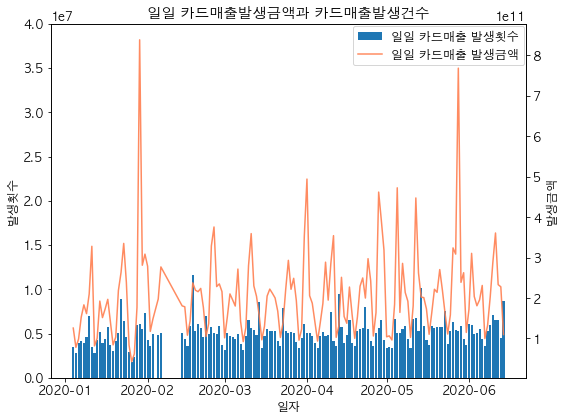

In [228]:
# daliy sales
sales = card_df['sales'].groupby(card_df['date']).sum()
sales_count = card_df['sales_count'].groupby(card_df['date']).sum()
sales = pd.DataFrame(sales)
sales_count = pd.DataFrame(sales_count)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(sales_count.index, sales_count.sales_count, label='일일 카드매출 발생횟수')
ax1.set_xlabel('일자')
ax1.set_ylabel('발생횟수')
ax1.set_ylim(0, 1e7*4)

ax2 = ax1.twinx()
ax2.plot(sales.index, sales.sales, label='일일 카드매출 발생금액', color='coral', alpha=0.9)
ax2.set_ylabel('발생금액')

plt.title('일일 카드매출발생금액과 카드매출발생건수')
fig.legend(bbox_to_anchor=(0.93, 0.94))
plt.tight_layout();

plt.savefig(output_DIR+'/일일 카드매출.png')

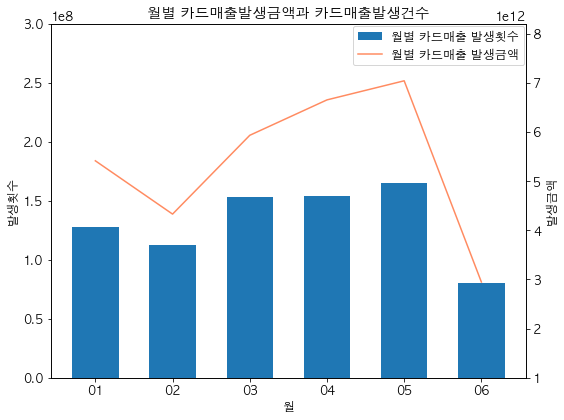

In [229]:
# monthly sales
sales = card_df['sales'].groupby(card_df['month']).sum()
sales_count = card_df['sales_count'].groupby(card_df['month']).sum()
sales = pd.DataFrame(sales)
sales_count = pd.DataFrame(sales_count)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(sales_count.index, sales_count.sales_count, label='월별 카드매출 발생횟수', width=0.6)
ax1.set_xlabel('월')
ax1.set_ylabel('발생횟수')
ax1.set_ylim(0, 1e8*3)

ax2 = ax1.twinx()
ax2.plot(sales.index, sales.sales, label='월별 카드매출 발생금액', color='coral', alpha=0.9)
ax2.set_ylabel('발생금액')
ax2.set_ylim(1e12, 1e12*8.2)

plt.title('월별 카드매출발생금액과 카드매출발생건수')
fig.legend(bbox_to_anchor=(0.93, 0.94))
plt.tight_layout();

plt.savefig(output_DIR+'/월별 카드매출.png')

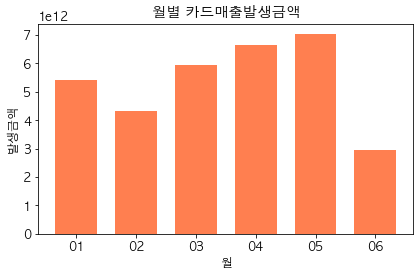

In [230]:
# monthly sales
plt.figure(figsize=(6, 4))
plt.bar(sales.index, sales.sales, label='월별 카드매출 발생금액', color='coral', width=0.7)
plt.title('월별 카드매출발생금액')
plt.xlabel('월')
plt.ylabel('발생금액')
plt.tight_layout();

plt.savefig(output_DIR+'/월별 카드매출_막대.png')

In [231]:
# industry category
sales = card_df['sales'].groupby(card_df['category']).sum()
sales_count = card_df['sales_count'].groupby(card_df['category']).sum()
sales = pd.DataFrame(sales)
sales_count = pd.DataFrame(sales_count)
bycat = sales.join(sales_count)
bycat = bycat.reset_index()

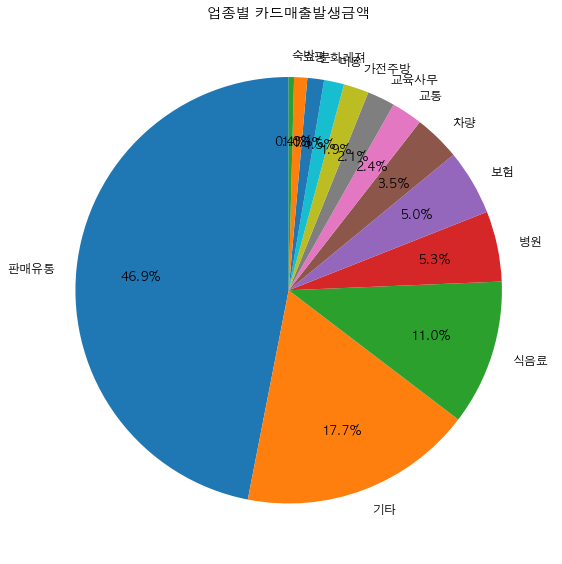

In [232]:
# sales by insdustry category
bycat = bycat.sort_values(by='sales', ascending=False)
labels = [x for x in bycat['category']]
ratio = [x for x in bycat['sales']]

plt.figure(figsize=(8, 8))
plt.rc('font', size=12)
plt.pie(ratio, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
plt.title('업종별 카드매출발생금액')
plt.tight_layout();

plt.savefig(output_DIR+'/업종별 카드매출.png')

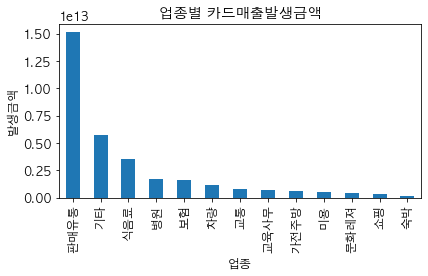

In [233]:
# sales by insdustry category
bycat.set_index('category').sort_values(by='sales', ascending=False).plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('업종별 카드매출발생금액')
plt.xlabel('업종')
plt.ylabel('발생금액')
plt.legend([], frameon=False)
plt.tight_layout();

plt.savefig(output_DIR+'/업종별 카드매출_막대.png')

`set_index()` : 데이터프레임 내 칼럼을 인덱스로 지정
- `inplace=True` 원본 객체를 변경

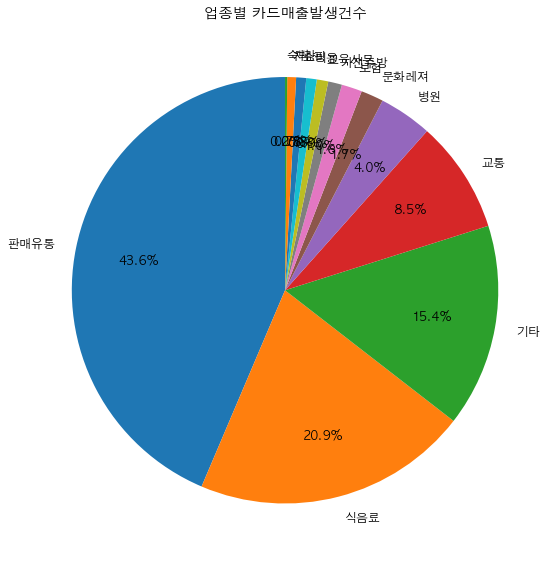

In [234]:
# sales count by insdustry category
bycat = bycat.sort_values(by='sales_count', ascending=False)
labels = [x for x in bycat['category']]
ratio = [x for x in bycat['sales_count']]

plt.figure(figsize=(8, 8))
plt.rc('font', size=12)
plt.pie(ratio, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
plt.title('업종별 카드매출발생건수')
plt.tight_layout();

plt.savefig(output_DIR+'/업종별 카드매출건수.png')

In [235]:
# city
sales = card_df['sales'].groupby(card_df['city_nm']).sum()
sales_count = card_df['sales_count'].groupby(card_df['city_nm']).sum()
sales = pd.DataFrame(sales)
sales_count = pd.DataFrame(sales_count)
bycity = sales.join(sales_count)
bycity = bycity.reset_index()

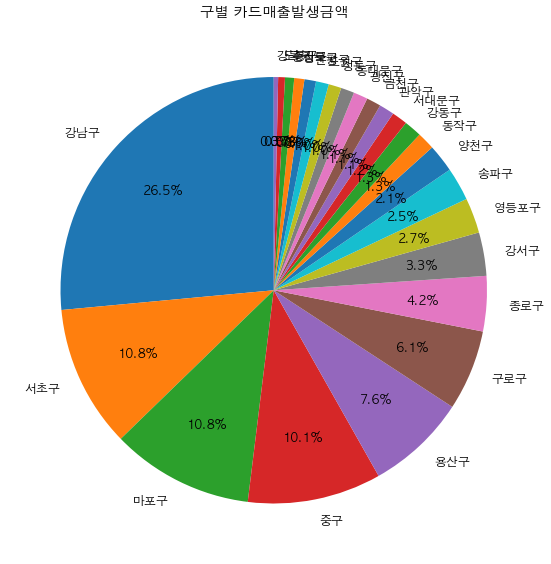

In [236]:
# sales by city
bycity = bycity.sort_values(by='sales', ascending=False)
labels = [x for x in bycity['city_nm']]
ratio = [x for x in bycity['sales']]

plt.figure(figsize=(8, 8))
plt.rc('font', size=12)
plt.pie(ratio, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
plt.title('구별 카드매출발생금액')
plt.tight_layout();

plt.savefig(output_DIR+'/구별 카드매출.png')

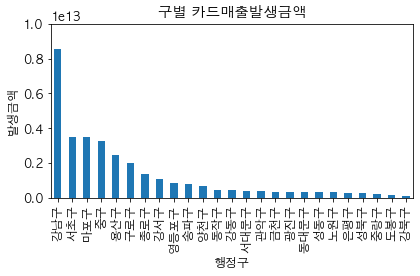

In [237]:
# sales by city
bycity.set_index('city_nm').sort_values(by='sales', ascending=False).plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('구별 카드매출발생금액');
plt.xlabel('행정구')
plt.ylabel('발생금액')
plt.ylim([0, 1e13])
plt.legend([], frameon=False)
plt.tight_layout();

plt.savefig(output_DIR+'/구별 카드매출_막대.png')

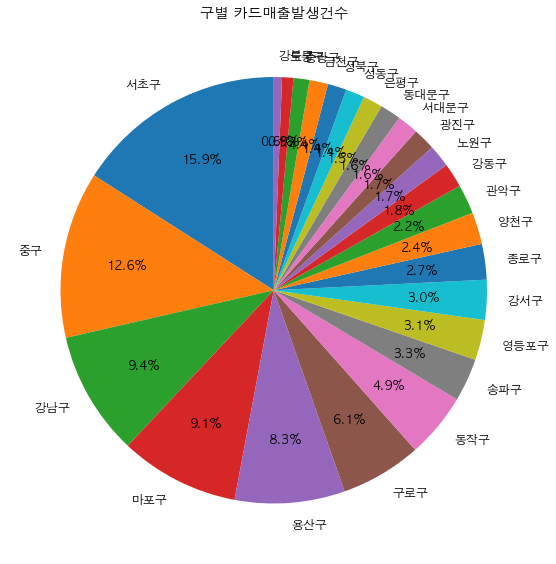

In [238]:
# sales count by city
bycity = bycity.sort_values(by='sales_count', ascending=False)
labels = [x for x in bycity['city_nm']]
ratio = [x for x in bycity['sales_count']]

plt.figure(figsize=(8, 8))
plt.rc('font', size=12)
plt.pie(ratio, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
plt.title('구별 카드매출발생건수')
plt.tight_layout();

plt.savefig(output_DIR+'/구별 카드매출건수.png')

In [239]:
# save dataframe
card_df.to_csv(output_DIR+'/card_df.csv', index=False)